## A tree is integral if it's eigenvalues are integers

#### We know that if a tree T has a path $P_n$ with $n >= 8$ then it must have at least 4 eigenvalues in the interval $(-2, 2)$. https://arxiv.org/pdf/2305.09406.pdf

#### Can we reduce the bound for n?

Trying graphs with 6 vertices
Trying graphs with 7 vertices
Trying graphs with 8 vertices
Trying graphs with 9 vertices
Trying graphs with 10 vertices
Trying graphs with 11 vertices
NEW MAX: 2
{0.0, 1.126032500610496, 2.1753277471610746, 1.9999999999999998, -1.1260325006104939, -2.175327747161076, -1.9999999999999998}


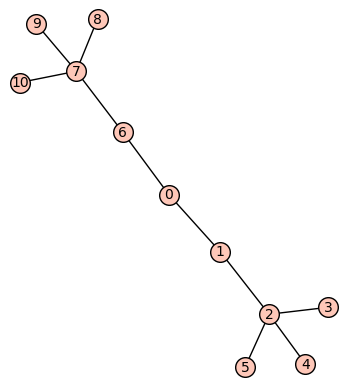

Trying graphs with 12 vertices
Trying graphs with 13 vertices
Trying graphs with 14 vertices
Trying graphs with 15 vertices
Trying graphs with 16 vertices
Trying graphs with 17 vertices
Trying graphs with 18 vertices
Trying graphs with 19 vertices
Trying graphs with 20 vertices


In [7]:
from sage.graphs.trees import TreeIterator
import numpy as np

eps = 1e-6

n = 6
r = 15
maxi = 0
T = []
for sz in range(n, n+r):
    print(f"Trying graphs with {sz} vertices")
    cnt = 0
    for t in TreeIterator(sz):
        if not t.is_connected():
            continue
            
        cnt+=1
        
        dg2_vtx = []
        for i in range(sz):
            if t.degree(i) == 2:
                dg2_vtx.append(i)
        
        t2 = t.subgraph(dg2_vtx)
        
        candidate = False
        new_maxi = 0
        for c in t2.connected_components_subgraphs():
            if c.size() > maxi:
                new_maxi = max(new_maxi, c.size())
                candidate = True
    
        if not candidate: continue
        
        eigv = set(np.linalg.eig(t.adjacency_matrix())[0])
        eig_cnt = 0
        
        for e in eigv:
            if -2 + eps < e and e < 2 - eps:
                eig_cnt += 1
        
        if eig_cnt <= 3:
            maxi = new_maxi
            print("NEW MAX:", maxi)
            print(eigv)
            t.plot().show()

### Eigv: [-1.12, 0, 1.12]